## Treinando ADs em alguns datasets


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# carregando o dataset MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False) # 28x28
#X, y = load_digits(return_X_y=True) # 8x8 -> 10 classes (0,...,9)

In [3]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0, shuffle=True)

In [4]:
X_train.shape

(42000, 784)

In [5]:
# Instanciamos a AD e treinamos no conjunto de treinamento
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [6]:
# Predição no conjunto de testes
preds = clf.predict(X_test)

In [7]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2812
           1       0.93      0.96      0.94      3179
           2       0.86      0.83      0.84      2787
           3       0.82      0.83      0.83      2815
           4       0.86      0.86      0.86      2678
           5       0.80      0.81      0.81      2523
           6       0.88      0.88      0.88      2740
           7       0.90      0.90      0.90      2927
           8       0.82      0.80      0.81      2716
           9       0.84      0.83      0.84      2823

    accuracy                           0.86     28000
   macro avg       0.86      0.86      0.86     28000
weighted avg       0.86      0.86      0.86     28000



In [8]:
# Agora treinaremos outros modelos para comparar com a AD:

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.linear_model import LogisticRegression

In [9]:
#lr = LogisticRegression(solver='liblinear', C=0.05, random_state=0, multi_class='ovr')
#lr.fit(X_train, Y_train)
svm = SVC(kernel='rbf', C=100)
svm.fit(X_train, Y_train)

SVC(C=100)

In [10]:
# Predição no conjunto de teste
preds_svm = svm.predict(X_test)

print(classification_report(Y_test, preds_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2812
           1       0.99      0.99      0.99      3179
           2       0.97      0.98      0.98      2787
           3       0.98      0.97      0.98      2815
           4       0.98      0.98      0.98      2678
           5       0.98      0.98      0.98      2523
           6       0.99      0.99      0.99      2740
           7       0.98      0.98      0.98      2927
           8       0.97      0.97      0.97      2716
           9       0.98      0.97      0.97      2823

    accuracy                           0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000



In [11]:
print("AD:", preds, "vs. LR:",preds_svm)

AD: ['0' '4' '1' ... '2' '8' '1'] vs. LR: ['0' '4' '1' ... '2' '8' '8']


In [12]:
# Normalizando os dados...

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [14]:
svm2 = SVC(kernel='rbf', C=100)
svm2.fit(x_train, Y_train)

SVC(C=100)

In [15]:
# Normalizando as amostras do conjunto de teste:
x_test = scaler.transform(X_test)

# em seguida, chamamos a função predict, passando o conjunto de teste:
y_pred = svm2.predict(x_test)

In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2812
           1       0.99      0.99      0.99      3179
           2       0.94      0.97      0.96      2787
           3       0.97      0.95      0.96      2815
           4       0.96      0.97      0.97      2678
           5       0.97      0.96      0.96      2523
           6       0.98      0.97      0.97      2740
           7       0.94      0.97      0.95      2927
           8       0.97      0.95      0.96      2716
           9       0.96      0.95      0.96      2823

    accuracy                           0.97     28000
   macro avg       0.97      0.97      0.97     28000
weighted avg       0.97      0.97      0.97     28000



In [17]:
print("AD:", preds, "vs. LR (normalização):", y_pred)

AD: ['0' '4' '1' ... '2' '8' '1'] vs. LR (normalização): ['0' '4' '1' ... '2' '8' '8']


In [18]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, Y_train)

y_pred2 = clf2.predict(x_test)
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2812
           1       0.93      0.96      0.94      3179
           2       0.84      0.84      0.84      2787
           3       0.82      0.82      0.82      2815
           4       0.87      0.87      0.87      2678
           5       0.80      0.81      0.81      2523
           6       0.88      0.88      0.88      2740
           7       0.89      0.89      0.89      2927
           8       0.82      0.79      0.81      2716
           9       0.84      0.83      0.84      2823

    accuracy                           0.86     28000
   macro avg       0.86      0.86      0.86     28000
weighted avg       0.86      0.86      0.86     28000



In [19]:
print("AD (normalização):", y_pred2, "vs. LR (normalização):", y_pred)

AD (normalização): ['0' '4' '1' ... '2' '8' '1'] vs. LR (normalização): ['0' '4' '1' ... '2' '8' '8']


Agora, podemos mostrar a estrutura de uma AD completa, treinada em todos os atributos do dataset:

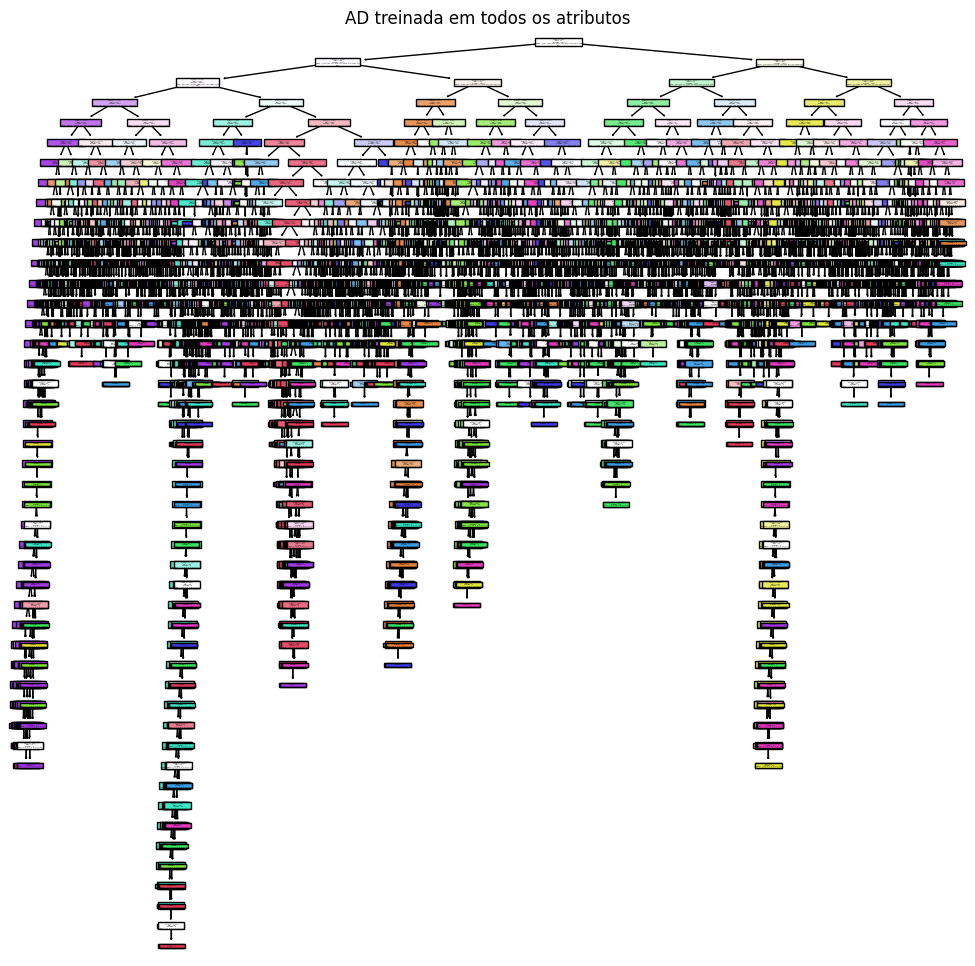

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
#clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf2, filled=True)
plt.title("AD treinada em todos os atributos")
plt.savefig("ad_mnist", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
from sklearn.decomposition import PCA

In [22]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0, shuffle=True)
X_train /= 255.
X_test /= 255.
X_train.shape

(42000, 784)

In [23]:
pca = PCA(n_components=150).fit(X_train)
x_pca = pca.transform(X_train)

In [24]:
svm = SVC()
svm.fit(x_pca, Y_train)

y_pred2 = svm.predict(pca.transform(X_test))
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2812
           1       0.99      0.99      0.99      3179
           2       0.98      0.98      0.98      2787
           3       0.98      0.97      0.98      2815
           4       0.97      0.98      0.98      2678
           5       0.98      0.98      0.98      2523
           6       0.98      0.99      0.99      2740
           7       0.98      0.98      0.98      2927
           8       0.97      0.97      0.97      2716
           9       0.97      0.97      0.97      2823

    accuracy                           0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000



In [25]:
DT = DecisionTreeClassifier()
DT.fit(x_pca, Y_train)

y_pred2 = DT.predict(pca.transform(X_test))
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2812
           1       0.94      0.96      0.95      3179
           2       0.81      0.81      0.81      2787
           3       0.79      0.77      0.78      2815
           4       0.78      0.78      0.78      2678
           5       0.74      0.75      0.74      2523
           6       0.88      0.88      0.88      2740
           7       0.84      0.84      0.84      2927
           8       0.75      0.74      0.74      2716
           9       0.76      0.75      0.75      2823

    accuracy                           0.82     28000
   macro avg       0.82      0.82      0.82     28000
weighted avg       0.82      0.82      0.82     28000

